In [ ]:
# ! rm -r copilot
# !rm -r images
# !rm -r utils
# !rm -r font
# !rm -r keras-yolo3-master/
# !rm -r keras-yolo3-queee/
# !rm -r model_data
# !rm -r videos
# !rm -r zoo
! git clone https://github.com/visualbuffer/copilot.git
! mv copilot/* ./
! mkdir videos
! mkdir images
! mkdir images/from_video
! mkdir images/detection
# ! wget  -P ./model_data/  https://pjreddie.com/media/files/yolov3.weights
! wget -P ./model_data/ https://s3-ap-southeast-1.amazonaws.com/deeplearning-mat/backend.h5
#!pip install git+git://github.com/minwook-shin/pytube --force

Cloning into 'copilot'...
remote: Enumerating objects: 119, done.
remote: Counting objects: 100% (119/119), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 482 (delta 53), reused 75 (delta 23), pack-reused 363
Receiving objects: 100% (482/482), 15.36 MiB | 23.61 MiB/s, done.
Resolving deltas: 100% (262/262), done.
mkdir: cannot create directory ‘images’: File exists
--2021-03-30 13:36:08--  https://s3-ap-southeast-1.amazonaws.com/deeplearning-mat/backend.h5
Resolving s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)... 52.219.133.54
Connecting to s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)|52.219.133.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248671664 (237M) [application/x-www-form-urlencoded]
Saving to: ‘./model_data/backend.h5’

backend.h5          100%[===================>] 237.15M  18.2MB/s    in 14s     

2021-03-30 13:36:23 (16.8 MB/s) - ‘./model_data/backend.h5’ saved [248671664/2486716

## Dependencies
We will import the dependencies and set up a helper function to extract youtube videos.

In [ ]:
pip install pytube

     |████████████████████████████████| 51kB 3.2MB/s 


In [ ]:
from pytube import YouTube 
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
def download_file(link, file) :
  video = "./videos/" #to_do 
  yt = YouTube(link)   
  yt.streams.filter(progressive=True, file_extension='mp4').order_by('resolution').first().download(output_path=video, filename=str(file))

  print(link, ' Downloaded to ',video+ str(file))

  return video+ str(file)+".mp4"

In [ ]:
download_file("https://www.youtube.com/watch?reload=9&v=rT0TQmxxeeE","electronic_city")
download_file("https://www.youtube.com/watch?v=b8iR1rcDxi4","nice_road")
download_file("https://www.youtube.com/watch?v=-SHw5gkB9Ow&list=PLvdT8C0jlPY0uFs8Ogh8Hb1FVvRe3DLj9","nh60")

https://www.youtube.com/watch?reload=9&v=rT0TQmxxeeE  Downloaded to  ./videos/electronic_city
https://www.youtube.com/watch?v=b8iR1rcDxi4  Downloaded to  ./videos/nice_road
https://www.youtube.com/watch?v=-SHw5gkB9Ow&list=PLvdT8C0jlPY0uFs8Ogh8Hb1FVvRe3DLj9  Downloaded to  ./videos/nh60


'./videos/nh60.mp4'

PERSPECTIVE TRANSFORMATION MATRIX COMPUTED


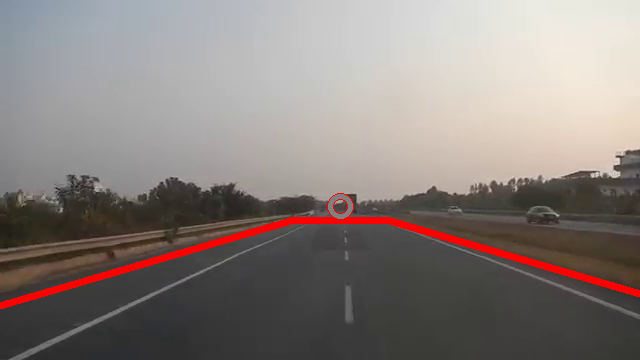

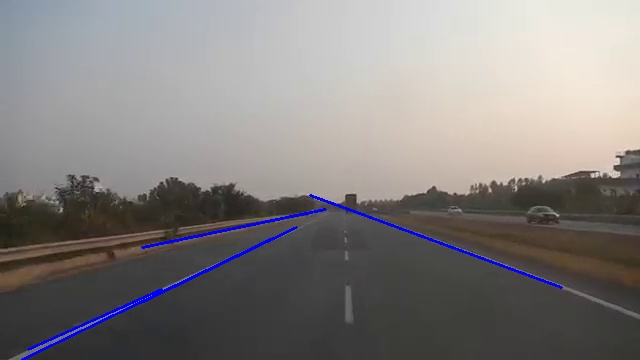

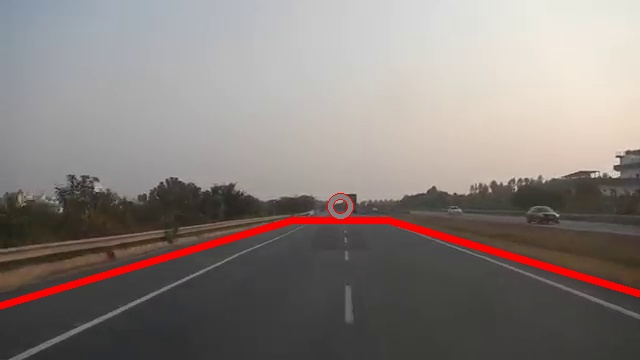

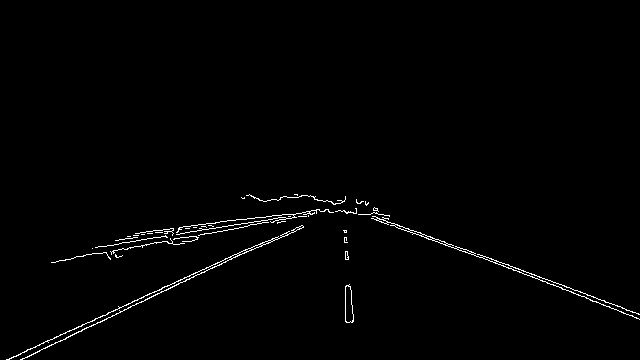

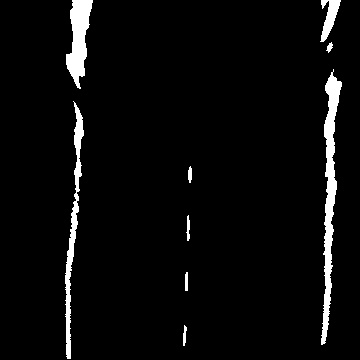

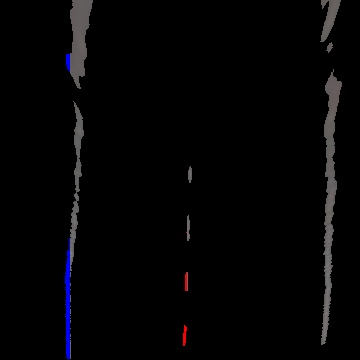

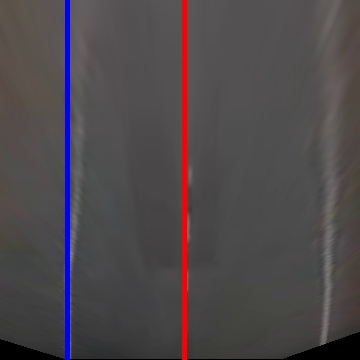

In [ ]:
from lane_detection import LANE_DETECTION
video_reader =  cv2.VideoCapture("./videos/nice_road.mp4") 
fps =  video_reader.get(cv2.CAP_PROP_FPS)
nb_frames = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
frame_h = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_w = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
pers_frame_time = 398# seconds
pers_frame = int(pers_frame_time *fps)
video_reader.set(1,pers_frame)
ret, image = video_reader.read()
ld = LANE_DETECTION( image,fps, 
                    yellow_lower = np.uint8([ 20, 50,   110]),
                    yellow_upper = np.uint8([35, 255, 255]),
                    white_lower = np.uint8([ 0, 140,   0]), 
                    white_upper = np.uint8([255, 255, 100]), 
                    lum_factor = 110,
                    lane_start=[0.2,0.5])
cv2_imshow(image)

cv2_imshow(cv2.imread("./images/detection/perspective_lines.jpg"))
cv2_imshow(cv2.imread("./images/detection/vanishing_point.jpg"))
cv2_imshow(cv2.imread("./images/detection/edges.jpg"))
cv2_imshow(cv2.imread("./images/detection/mask.jpg"))
cv2_imshow(cv2.imread("./images/detection/masked_regions.jpg"))
cv2_imshow(cv2.imread("./images/detection/lane_width.jpg"))







# proc_img = ld.process_image(image)
# cv2_imshow(proc_img)


In [ ]:
image.shape

(360, 640, 3)

In [ ]:
from frame import FRAME

file_path =  "./videos/nice_road.mp4"# <== Upload appropriate file          
video_out = "videos/output11.mov"
frame =  FRAME( 
    ego_vehicle_offset = .0,                       # offset for self vehicle in frame
    yellow_lower = np.uint8([ 20, 50,   110]),      # LOWER YELLOW HLS THRESHOLD
    yellow_upper = np.uint8([35, 255, 255]),        # UPER YELLOW HLS THRESHOLD
    white_lower = np.uint8([ 0, 140,   0]),         # LOWER WHITE THRESHOLD
    white_upper = np.uint8([180, 255, 100]),        # UPPER WHITE THRESHOLD
    lum_factor = 110,                               # NORMALIZING LUM FACTOR
    max_gap_th = 0.45,                              # MAX GAP THRESHOLD
    YOLO_PERIOD = 2,                              # YOLO PERIOD
    lane_start=[0.2,0.5] ,                        # LANE INITIATION
    verbose = 3)                                  # VERBOSITY
frame.process_video(file_path, 2,\
        video_out = video_out,pers_frame_time =398,\
        t0  =398 , t1 =698)#None)                  

  0%|          | 0/8991 [00:00<?, ?it/s]

./videos/nice_road.mp4 WIDTH 640 HEIGHT 360 FPS 29.97 DUR 1686.0 s
PERSPECTIVE TRANSFORMATION MATRIX COMPUTED


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
  0%|          | 1/8991 [00:31<79:33:47, 31.86s/it]


LANE CHANGE TO RIGHT

LANE CHANGE TO LEFT


  2%|▏         | 191/8991 [00:34<54:31:45, 22.31s/it]


LANE CHANGE TO RIGHT


  7%|▋         | 601/8991 [00:41<25:29:30, 10.94s/it]


LANE CHANGE TO LEFT


  9%|▉         | 829/8991 [00:44<17:22:06,  7.66s/it]

SKIPPED 23% BREACHED 5% RESET 1% APPENDED 70% | Time 51s , Processing FPS 8.24 vs Desired FPS 14.00  


 12%|█▏        | 1057/8991 [00:47<11:49:37,  5.37s/it]


LANE CHANGE TO LEFT


 14%|█▍        | 1237/8991 [00:50<8:06:07,  3.76s/it] 


LANE CHANGE TO RIGHT


 19%|█▊        | 1673/8991 [00:56<3:45:40,  1.85s/it]

SKIPPED 15% BREACHED 2% RESET 0% APPENDED 81% | Time 12s , Processing FPS 35.00 vs Desired FPS 14.00  

LANE CHANGE TO RIGHT


 21%|██        | 1910/8991 [00:59<2:33:18,  1.30s/it]


LANE CHANGE TO RIGHT


 28%|██▊       | 2503/8991 [01:10<49:25,  2.19it/s]  

SKIPPED 17% BREACHED 4% RESET 0% APPENDED 76% | Time 14s , Processing FPS 30.00 vs Desired FPS 14.00  


 32%|███▏      | 2865/8991 [01:17<23:54,  4.27it/s]


LANE CHANGE TO RIGHT


 37%|███▋      | 3363/8991 [01:27<08:46, 10.70it/s]

SKIPPED 56% BREACHED 4% RESET 0% APPENDED 38% | Time 17s , Processing FPS 24.71 vs Desired FPS 14.00  

LANE CHANGE TO LEFT

LANE CHANGE TO RIGHT

LANE CHANGE TO LEFT


 39%|███▉      | 3531/8991 [01:30<06:26, 14.13it/s]


LANE CHANGE TO RIGHT

LANE CHANGE TO LEFT

LANE CHANGE TO RIGHT


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)



LANE CHANGE TO LEFT


 43%|████▎     | 3885/8991 [01:36<03:41, 23.03it/s]


LANE CHANGE TO LEFT

LANE CHANGE TO RIGHT


 45%|████▌     | 4054/8991 [01:39<02:56, 27.98it/s]


LANE CHANGE TO LEFT

LANE CHANGE TO RIGHT

LANE CHANGE TO RIGHT

LANE CHANGE TO LEFT

LANE CHANGE TO LEFT
SKIPPED 33% BREACHED 16% RESET 3% APPENDED 47% | Time 15s , Processing FPS 28.00 vs Desired FPS 14.00  

LANE CHANGE TO RIGHT


 47%|████▋     | 4223/8991 [01:43<02:27, 32.26it/s]


LANE CHANGE TO RIGHT


 49%|████▉     | 4386/8991 [01:47<02:16, 33.66it/s]


LANE CHANGE TO LEFT


 53%|█████▎    | 4801/8991 [01:53<01:31, 45.54it/s]


GOT EXEPTION TO PROCES THE IMAGE 2438

GOT EXEPTION TO PROCES THE IMAGE 2469

LANE CHANGE TO LEFT


 55%|█████▌    | 4985/8991 [01:56<01:21, 49.25it/s]

SKIPPED 29% BREACHED 7% RESET 1% APPENDED 61% | Time 14s , Processing FPS 30.00 vs Desired FPS 14.00  

LANE CHANGE TO RIGHT


 64%|██████▍   | 5758/8991 [02:10<01:02, 52.13it/s]


LANE CHANGE TO RIGHT

GOT EXEPTION TO PROCES THE IMAGE 2913

LANE CHANGE TO LEFT

LANE CHANGE TO RIGHT
SKIPPED 32% BREACHED 8% RESET 0% APPENDED 57% | Time 16s , Processing FPS 26.25 vs Desired FPS 14.00  

LANE CHANGE TO LEFT


 66%|██████▌   | 5926/8991 [02:15<01:11, 43.06it/s]


LANE CHANGE TO RIGHT


 68%|██████▊   | 6097/8991 [02:18<01:02, 46.42it/s]


LANE CHANGE TO LEFT

LANE CHANGE TO RIGHT

LANE CHANGE TO LEFT

LANE CHANGE TO RIGHT

GOT EXEPTION TO PROCES THE IMAGE 3100

GOT EXEPTION TO PROCES THE IMAGE 3102

GOT EXEPTION TO PROCES THE IMAGE 3103

LANE CHANGE TO LEFT

LANE CHANGE TO LEFT


 70%|██████▉   | 6277/8991 [02:21<00:54, 49.73it/s]


LANE CHANGE TO RIGHT


 72%|███████▏  | 6457/8991 [02:24<00:48, 52.31it/s]


LANE CHANGE TO RIGHT

GOT EXEPTION TO PROCES THE IMAGE 3287


 74%|███████▎  | 6623/8991 [02:28<00:47, 50.15it/s]

SKIPPED 35% BREACHED 19% RESET 2% APPENDED 41% | Time 15s , Processing FPS 28.00 vs Desired FPS 14.00  


 78%|███████▊  | 6975/8991 [02:34<00:38, 52.14it/s]


LANE CHANGE TO LEFT


 84%|████████▎ | 7529/8991 [02:40<00:22, 66.42it/s]

SKIPPED 68% BREACHED 2% RESET 0% APPENDED 28% | Time 10s , Processing FPS 42.00 vs Desired FPS 14.00  

LANE CHANGE TO RIGHT

LANE CHANGE TO RIGHT

LANE CHANGE TO LEFT

LANE CHANGE TO LEFT


 86%|████████▋ | 7757/8991 [02:45<00:19, 63.10it/s]


GOT EXEPTION TO PROCES THE IMAGE 3911


 89%|████████▊ | 7967/8991 [02:50<00:18, 54.75it/s]


LANE CHANGE TO RIGHT


 91%|█████████ | 8152/8991 [02:56<00:19, 42.83it/s]


LANE CHANGE TO LEFT

LANE CHANGE TO RIGHT

LANE CHANGE TO LEFT

LANE CHANGE TO RIGHT

LANE CHANGE TO RIGHT


 92%|█████████▏| 8307/8991 [02:59<00:15, 44.34it/s]


GOT EXEPTION TO PROCES THE IMAGE 4178

GOT EXEPTION TO PROCES THE IMAGE 4179

GOT EXEPTION TO PROCES THE IMAGE 4180
SKIPPED 67% BREACHED 15% RESET 2% APPENDED 13% | Time 20s , Processing FPS 21.00 vs Desired FPS 14.00  

LANE CHANGE TO LEFT


 94%|█████████▍| 8459/8991 [03:03<00:12, 43.30it/s]


LANE CHANGE TO LEFT

LANE CHANGE TO RIGHT

LANE CHANGE TO LEFT


 96%|█████████▌| 8603/8991 [03:06<00:09, 43.04it/s]


GOT EXEPTION TO PROCES THE IMAGE 4328


 99%|█████████▉| 8881/8991 [03:12<00:02, 44.55it/s]


LANE CHANGE TO RIGHT


100%|██████████| 8991/8991 [03:15<00:00, 46.11it/s]

SKIPPED 1666 BREACHED 425 RESET 67 APPENDED 2326 | Total 4496 
SAVED TO  videos/output11.mov


## Save the file
The file is save in the colabspace ./videos/output11.mov . If you want to save it into your google drive (signin reguired) execute the code block below

[Youtube Source Video Link](https://www.youtube.com/watch?v=b8iR1rcDxi4)

[Youtube Processed Video Link](https://youtu.be/Kgd5CPJ-kXM)